# Imports

In [3]:
# Bibliotecas para aumentar dataset #####################
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.vgg16 import VGG16 #Biblioteca cnn-vgg16
import numpy as np

#####################  Bibliotecas para separar dados #####################
import cv2 #Trabalhar com imagens
from sklearn.model_selection import train_test_split #Separar dados de treino e teste
from sklearn.utils import shuffle #Embaralhar dados
import os #sistema operacional

# Função para aumentar o dataset

In [1]:
def dataAugmentation(path, classe):
    image = load_img(path)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    # contruindo o gerador de imagem para data augmentation
    aug = ImageDataGenerator(
        rotation_range=30,
        zoom_range=0.15,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode="nearest")
    
    total = 0
    saveDir = ''
    #local de destino das imagens
    if(classe == 0):
        saveDir = os.getcwd()+'/Aug/NewG0/'
    elif(classe == 1):
        saveDir = os.getcwd()+'/Aug/NewG1/'
    elif(classe == 2):
        saveDir = os.getcwd()+'/Aug/NewG2/'
    elif(classe == 3):
        saveDir = os.getcwd()+'/Aug/NewG3/'
    elif(classe == 4):
        saveDir = os.getcwd()+'/Aug/NewG4/'
        
    imageGen = aug.flow(image, batch_size=1, save_to_dir=saveDir,
            save_prefix="image", save_format="jpg")
    # loop que faz o controle do número de imagens a serem geradas (no caso 100)
    for image in imageGen:
        total += 1
        if total == 15:
            break

# Data augmentation

In [4]:
path = os.getcwd()+'/GrausPt/'

for caminho, d, file in os.walk(path):
    for filename in file:
        img = cv2.imread(os.path.join(caminho,filename))

        if caminho == os.getcwd()+'/GrausPt/g0':
            cv2.imwrite(os.getcwd()+'/Aug/NewG0/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 0)
       
        elif caminho == os.getcwd()+'/GrausPt/g1':
            cv2.imwrite(os.getcwd()+'/Aug/NewG1/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 1)
          
        elif caminho == os.getcwd()+'/GrausPt/g2':
            cv2.imwrite(os.getcwd()+'/Aug/NewG2/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 2)
            
        elif caminho == os.getcwd()+'/GrausPt/g3':
            cv2.imwrite(os.getcwd()+'/Aug/NewG3/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 3)
        
        elif caminho == os.getcwd()+'/GrausPt/g4':
            cv2.imwrite(os.getcwd()+'/Aug/NewG4/'+filename, img)
            dataAugmentation(os.path.join(caminho,filename), 4)

In [5]:
path = os.getcwd()+'/Aug/'
data_set = []
saidas = []
        
for caminho, d, file in os.walk(path):
    for filename in file:
        
        img = cv2.imread(os.path.join(caminho,filename))
        
        #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Deixa a imagem com tons de cinza
        #equalized_image = cv2.equalizeHist(gray) #Aumentar o contraste da imagem
        #img2 = np.array(cv2.resize(gray, (224,224), interpolation = cv2.INTER_AREA))
        data_set.append(img)
        
        if caminho == os.getcwd()+'/Aug/NewG0':
            saidas.append(0)
        elif caminho == os.getcwd()+'/Aug/NewG1':
            saidas.append(1)
        elif caminho == os.getcwd()+'/Aug/NewG2':
            saidas.append(2)
        elif caminho == os.getcwd()+'/Aug/NewG3':
            saidas.append(3)
        elif caminho == os.getcwd()+'/Aug/NewG4':
            saidas.append(4)

In [6]:
len(saidas), len(data_set)

(5661, 5661)

In [7]:
X, Y = shuffle(data_set, saidas) #embaralha os dados

train_X = []
train_Y = []

test_X = []
test_Y = []

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=42) #separa os dados em treino e teste com porcentagen de 80% para treino

#Deixando no mesmo tipo do array do data_set
train_Y = np.array(train_Y).astype('uint8')
test_Y = np.array(test_Y).astype('uint8')

train_X = np.array(train_X)
test_X = np.array(test_X)

In [8]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Tamanho e quantidade da base de dados de treino:', train_X.shape, train_Y.shape)

print('Tamanho e quantidade da base de dados de teste:', test_X.shape, test_Y.shape)

Tamanho e quantidade da base de dados de treino: (4528, 128, 128, 3) (4528,)
Tamanho e quantidade da base de dados de teste: (1133, 128, 128, 3) (1133,)


In [9]:
# Encontra o numero de classes
classes = np.unique(train_Y) #Pega o valores sem repetição
nClasses = len(classes)
print('Numero total de classes:', nClasses)
print('Saida das classes:', classes)

Numero total de classes: 5
Saida das classes: [0 1 2 3 4]


Text(0.5, 1.0, 'Classe : 2')

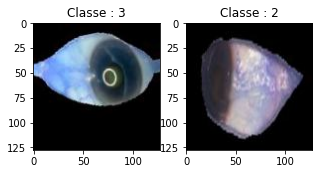

In [10]:
plt.figure(figsize=[5,5])

#Mostra a primeira imagem dos dados de treino

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Classe : {}".format(train_Y[0]))

#Mostra a primeira imagem dos dados de teste
plt.subplot(122)
plt.imshow(test_X[5,:,:], cmap='gray')
plt.title("Classe : {}".format(test_Y[5]))

In [11]:
# Deixar as imagens na mesma dimensão
train_X = train_X.reshape(-1, 128, 128, 3)
test_X = test_X.reshape(-1, 128, 128, 3)
train_X.shape, test_X.shape

((4528, 128, 128, 3), (1133, 128, 128, 3))

In [12]:
#Normalizando a imagens deixando os pixels entre 0 e 1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [13]:
# Mudança de codificação de código de classe para se padronizar com o Keras.
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Testando a padronização de rotulo
print('Rotulo Original:', train_Y[0])
print('Depois da conversão para o one-hot:', train_Y_one_hot[0])

Rotulo Original: 3
Depois da conversão para o one-hot: [0. 0. 0. 1. 0.]


In [14]:
#Validação do modelo
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
train_X[0].shape, valid_X.shape, train_label.shape, valid_label.shape

((128, 128, 3), (906, 128, 128, 3), (3622, 5), (906, 5))

In [16]:
#A rede
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD

In [17]:
batch_size = 64 #Quantidade de neuronios que seram utilizados.
epochs = 10 #Interações
num_classes = 5

# TRANSFER LEARNING

In [287]:
vgg = keras.applications.VGG16(input_shape=(128,128,3), include_top = False, weights= 'imagenet')

In [288]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)
tf_model=Model(inputs=vgg.input,outputs=out)
for layer in tf_model.layers[:20]:
    layer.trainable=False

In [289]:
tf_model.compile(optimizer=keras.optimizers.Adam(), loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [290]:
train_label.shape

(2142, 5)

In [291]:
history = tf_model.fit(train_X, train_label, batch_size = 64, epochs = 60, initial_epoch = 0, validation_data = (valid_X, valid_label))

Train on 2142 samples, validate on 536 samples
Epoch 1/60
2142/2142 [==============================] - 13s 6ms/step - loss: 1.9431 - accuracy: 0.4174 - val_loss: 1.2544 - val_accuracy: 0.5093
Epoch 2/60
2142/2142 [==============================] - 11s 5ms/step - loss: 1.2053 - accuracy: 0.5187 - val_loss: 1.0296 - val_accuracy: 0.5802
Epoch 3/60
2142/2142 [==============================] - 11s 5ms/step - loss: 1.0425 - accuracy: 0.5780 - val_loss: 0.9048 - val_accuracy: 0.6381
Epoch 4/60
2142/2142 [==============================] - 11s 5ms/step - loss: 0.8989 - accuracy: 0.6340 - val_loss: 0.8355 - val_accuracy: 0.6567
Epoch 5/60
2142/2142 [==============================] - 10s 5ms/step - loss: 0.7970 - accuracy: 0.7026 - val_loss: 0.7396 - val_accuracy: 0.7034
Epoch 6/60
2142/2142 [==============================] - 10s 5ms/step - loss: 0.7173 - accuracy: 0.7199 - val_loss: 0.6830 - val_accuracy: 0.7127
Epoch 7/60
2142/2142 [==============================] - 11s 5ms/step - loss: 0.6412

In [292]:
#Salvando treinamento
tf_model.save("fashion_model_dropout.h5py")

In [293]:
#Validação da parte de teste
test_eval = tf_model.evaluate(test_X, test_Y_one_hot, verbose=1)

670/670 [==============================] - 1s 2ms/step


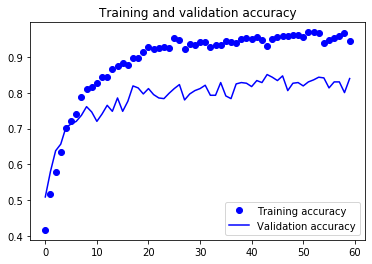

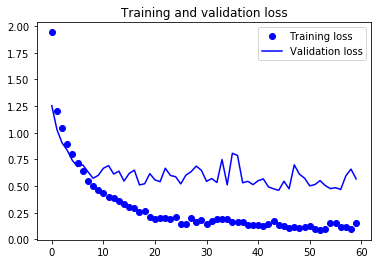

In [295]:
#Plotando graficos referentes a treinamento e validação acurácia e loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [296]:
#Predizendo a  classe a partir da base de teste_X
predicted_classes = tf_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((670,), (670,))

In [297]:
correct = np.where(predicted_classes==test_Y)[0]

Found 548 correct labels


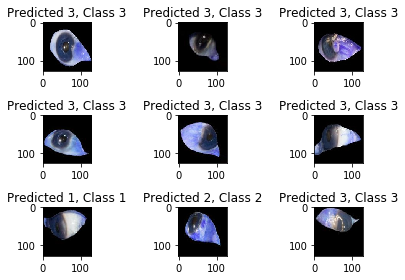

In [298]:
#Mostrando a quantidade de acertos e alguns exemplos
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 122 incorrect labels


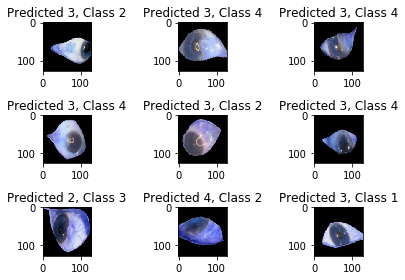

In [299]:
#Mostrando a quantidade de erros e alguns exemplos
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [300]:
#Precisão de classificação
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.71      0.90      0.79        40
     Class 1       0.85      0.88      0.87        33
     Class 2       0.75      0.64      0.69        77
     Class 3       0.83      0.92      0.88       359
     Class 4       0.84      0.63      0.72       161

    accuracy                           0.82       670
   macro avg       0.80      0.79      0.79       670
weighted avg       0.82      0.82      0.81       670



# REDE CRIADA PARA CLASSIFICAR

In [38]:
fashion_model = Sequential()

fashion_model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(128,128,3)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.2))

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.01))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.01))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.01))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Flatten())
fashion_model.add(Dense(512, activation='sigmoid'))
fashion_model.add(LeakyReLU(alpha=0.01))           
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(num_classes, activation='softmax'))
sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)

In [19]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0

In [20]:
#Compilando a rede neural criada usando como metrica a accurancy
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [21]:
import time
ini = time.time()
fim = time.time()
print(f'tempo: {ini-fim}')

tempo: -0.0001125335693359375


In [30]:
#Treinando a rede
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=64,epochs=40,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/40
57/57 [==============================] - 27s 465ms/step - loss: 0.1689 - accuracy: 0.9398 - val_loss: 0.3632 - val_accuracy: 0.8797
Epoch 2/40
57/57 [==============================] - 26s 462ms/step - loss: 0.1659 - accuracy: 0.9440 - val_loss: 0.3301 - val_accuracy: 0.8918
Epoch 3/40
57/57 [==============================] - 27s 469ms/step - loss: 0.1481 - accuracy: 0.9503 - val_loss: 0.3474 - val_accuracy: 0.8874
Epoch 4/40
57/57 [==============================] - 27s 472ms/step - loss: 0.1430 - accuracy: 0.9506 - val_loss: 0.3054 - val_accuracy: 0.8940
Epoch 5/40
57/57 [==============================] - 27s 471ms/step - loss: 0.1400 - accuracy: 0.9533 - val_loss: 0.3178 - val_accuracy: 0.8896
Epoch 6/40
57/57 [==============================] - 27s 471ms/step - loss: 0.1396 - accuracy: 0.9500 - val_loss: 0.3115 - val_accuracy: 0.8929
Epoch 7/40
57/57 [==============================] - 27s 470ms/step - loss: 0.1404 - accuracy: 0.9481 - val_loss: 0.3089 - val_accuracy: 0.8951

In [31]:
#Salvando treinamento
fashion_model.save("semTransfer.h5py")

INFO:tensorflow:Assets written to: semTransfer.h5py/assets


In [32]:
#Validação da parte de teste
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

36/36 [==============================] - 2s 47ms/step - loss: 0.3724 - accuracy: 0.8985


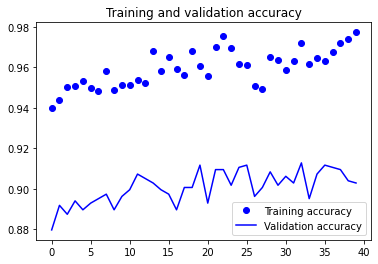

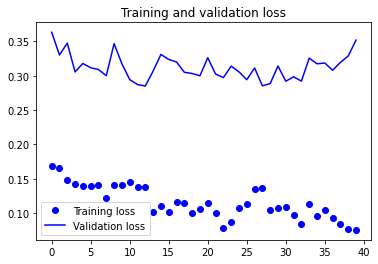

In [33]:
#Plotando graficos referentes a treinamento e validação acurácia e loss
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
#Predizendo a  classe a partir da base de teste_X
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((1133,), (1133,))

Found 1018 correct labels


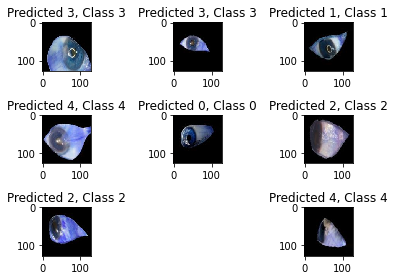

In [35]:
#Mostrando a quantidade de acertos e alguns exemplos
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 115 incorrect labels


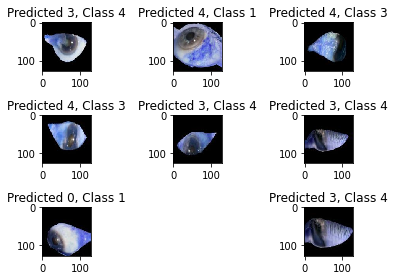

In [36]:
#Mostrando a quantidade de erros e alguns exemplos
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(128,128,3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [37]:
#Precisão de classificação
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93        92
     Class 1       0.93      0.81      0.87        64
     Class 2       0.92      0.74      0.82       117
     Class 3       0.89      0.96      0.92       578
     Class 4       0.90      0.85      0.87       282

    accuracy                           0.90      1133
   macro avg       0.91      0.86      0.88      1133
weighted avg       0.90      0.90      0.90      1133

